# model load

In [2]:
import os
import sys
from feedback_algorithm.locateframe_fb import *
sys.path.append('/root/Edwin/hand-detection-YoloKeras')
from load_hdmodel import *
from get_interpretation import *
import cv2

Using TensorFlow backend.


In [3]:
model_hand = load_hdmodel()

model path: /root/Edwin/hand-detection-YoloKeras/pretrain/


/root/team3/yes/envs/YoloKeras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
model_hand

# image load

In [6]:
img_path = '/root/Edwin/hand-detection-YoloKeras/hand/4.jpg'
save_path = './result.png'

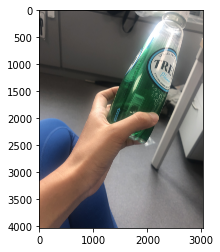

In [7]:
img=cv2.imread(img_path, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

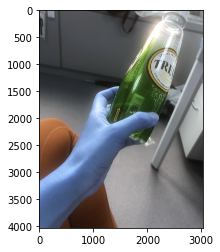

In [8]:
preporcessed_img , img_cv = preprocess_img(img)
plt.imshow(img_cv)

# prediction

In [9]:
start = time.time()
out2 = model_hand.predict(preporcessed_img)[0]
end = time.time()
print('prediction time:',end-start)

prediction time: 0.3594648838043213


In [9]:
print(out2)

[[[-1.20927167e+00 -5.07949293e-01 -6.51894450e-01 ...  3.47013205e-01
   -7.69823503e+00  4.30067480e-01]
  [-1.54743701e-01 -8.56759191e-01  5.99759459e-01 ... -1.44563884e-01
   -7.66697598e+00  2.01812133e-01]
  [-5.45659781e-01 -8.92046869e-01  6.70344949e-01 ...  1.39574092e-02
   -7.96220016e+00  9.17627960e-02]
  ...
  [-5.46029150e-01 -8.59989703e-01  7.50354707e-01 ... -2.08883777e-01
   -6.84209585e+00  2.28545845e-01]
  [-1.55267969e-01 -4.24485058e-01  1.01236749e+00 ... -1.74521893e-01
   -6.61187887e+00  3.32422331e-02]
  [ 1.11617732e+00  6.47097170e-01  2.19641298e-01 ...  4.36778255e-02
   -5.66632318e+00 -2.85428762e-01]]

 [[-2.09421873e+00 -7.92986155e-01 -1.74245059e+00 ... -9.04017687e-02
   -8.34366608e+00  5.26822031e-01]
  [-3.29820156e-01 -7.92760611e-01 -5.67212880e-01 ... -4.38733041e-01
   -8.10048485e+00  3.93194735e-01]
  [-5.10537326e-01 -8.01147342e-01 -7.02353418e-01 ... -2.33408108e-01
   -8.48142052e+00  2.37274274e-01]
  ...
  [-7.77943790e-01  4.3

# Interpretation

In [10]:
results = interpret_output_yolov2(out2, img.shape[1], img.shape[0])
print(results)


[['hand', 1275.4175303715747, 2080.8844165387336, 971.5329320771732, 1253.9666054300221, 0.7272893], ['hand', 1949.5185739075632, 2091.8866089645717, 569.5990867548578, 474.96373384764166, 0.88441247]]


# Show Results and Save

len results: 2


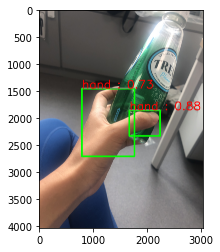

In [11]:
#Age and Gender Detection
img_cp=show_results(img_cv,results, img.shape[1], img.shape[0])
plt.imshow(img_cp)
plt.imsave(save_path,img_cp)

# Get locateframe Feedback 

In [12]:
frame_size = img_cp.shape
generate_locateframe_fb(results,frame_size)

'up'